In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(titanic_df.head())

# titanic_df.head()

First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Summary statistics
print("\nSummary statistics:")
print(titanic_df.describe())




Summary statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [4]:
# Data cleaning
# Handling missing values
print("\nHandling missing values:")
print(titanic_df.isnull().sum())



Handling missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# Impute missing values for 'age' with median
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

# Impute missing values for 'embarked' with mode
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)



In [6]:
print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# Make a copy of the DataFrame
titanic_df_copy = titanic_df.copy()

In [8]:
titanic_df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
# Outlier detection and treatment
print("\nOutlier detection and treatment:")

# Detect outliers in 'fare' using z-score
z_scores = np.abs(stats.zscore(titanic_df['fare']))
outlier_threshold = 3
outliers = titanic_df.loc[z_scores > outlier_threshold, 'fare']
print("Number of outliers in 'fare':", len(outliers))

# Remove outliers in 'fare'
titanic_df = titanic_df.loc[z_scores <= outlier_threshold]




Outlier detection and treatment:
Number of outliers in 'fare': 20


In [10]:
# Feature engineering
# Creating derived features
print("\nFeature engineering:")
# Create a new feature 'family_size' by combining 'sibsp' and 'parch'
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']



Feature engineering:


<ipython-input-10-5becb5f5003c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']


In [11]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [12]:
# Encoding categorical variables
print("\nEncoding categorical variables:")
# Convert 'sex' and 'embarked' to numerical format using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'embarked'],drop_first=False)



Encoding categorical variables:


In [13]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,1,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,False,True,False,False,True


In [14]:
titanic_df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'family_size',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in titanic_df_copy.columns:
    if titanic_df_copy[column].dtype == 'object':
        # If the column is categorical, use LabelEncoder to encode its values
        titanic_df_copy[column + '_encoded'] = label_encoder.fit_transform(titanic_df_copy[column])

        # Delete the original categorical column
        del titanic_df_copy[column]

# Now, the categorical columns have been label encoded with '_encoded' appended to their names,
# and the original categorical columns have been deleted


In [16]:
# another method is label encoding
#from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
#label_encoder = LabelEncoder()

# Convert the 'embarked' and 'sex' columns back to their original categorical form
#titanic_df_copy['embarked'] = titanic_df_copy['embarked'].astype(str)
#titanic_df_copy['sex'] = titanic_df_copy['sex'].astype(str)

# Encode the 'embarked' column
#titanic_df_copy['embarked_encoded'] = label_encoder.fit_transform(titanic_df_copy['embarked'])

# Encode the 'sex' column
#titanic_df_copy['sex_encoded'] = label_encoder.fit_transform(titanic_df_copy['sex'])

# Encode the 'class'  column
#titanic_df_copy['class_encoded'] = label_encoder.fit_transform(titanic_df_copy['class'])

# Encode the 'who' column
#titanic_df_copy['who_encoded'] = label_encoder.fit_transform(titanic_df_copy['who'])

# Encode the 'who' column
#titanic_df_copy['who_encoded'] = label_encoder.fit_transform(titanic_df_copy['who'])

# Encode the 'deck' column
#titanic_df_copy['deck_encoded'] = label_encoder.fit_transform(titanic_df_copy['deck'])

# Encode the 'embark_town' column
#titanic_df_copy['embark_town_encoded'] = label_encoder.fit_transform(titanic_df_copy['embark_town'])


In [17]:
titanic_df_copy.head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone,sex_encoded,embarked_encoded,who_encoded,embark_town_encoded,alive_encoded
0,0,3,22.0,1,0,7.2500,Third,True,NaN,False,1,2,1,2,0
1,1,1,38.0,1,0,71.2833,First,False,C,False,0,0,2,0,1
2,1,3,26.0,0,0,7.9250,Third,False,NaN,True,0,2,2,2,1
3,1,1,35.0,1,0,53.1000,First,False,C,False,0,2,2,2,1
4,0,3,35.0,0,0,8.0500,Third,True,NaN,True,1,2,1,2,0


In [18]:
# Select numerical columns from the DataFrame for correlaion analysis
titanic_df_copy_numerical_df = titanic_df_copy.select_dtypes(include=['int', 'float'])

# Display the first few rows of the new DataFrame
print("New DataFrame with numerical columns:")
print(titanic_df_copy_numerical_df.head())

New DataFrame with numerical columns:
   survived  pclass   age  sibsp  parch     fare  sex_encoded  \
0         0       3  22.0      1      0   7.2500            1   
1         1       1  38.0      1      0  71.2833            0   
2         1       3  26.0      0      0   7.9250            0   
3         1       1  35.0      1      0  53.1000            0   
4         0       3  35.0      0      0   8.0500            1   

   embarked_encoded  who_encoded  embark_town_encoded  alive_encoded  
0                 2            1                    2              0  
1                 0            2                    0              1  
2                 2            2                    2              1  
3                 2            2                    2              1  
4                 2            1                    2              0  


In [19]:
# Correlation analysis
print("\nCorrelation analysis:")


# Now, you can use the 'class_encoded' column for correlation calculation
pearson_corr = titanic_df_copy_numerical_df.corr(method='pearson')
print("Pearson correlation matrix:")
print(pearson_corr)

# Spearman correlation
spearman_corr = titanic_df_copy_numerical_df.corr(method='spearman')
print("\nSpearman correlation matrix:")
print(spearman_corr)

# Kendall correlation
kendall_corr = titanic_df_copy_numerical_df.corr(method='kendall')
print("\nKendall correlation matrix:")
print(kendall_corr)



Correlation analysis:
Pearson correlation matrix:
                     survived    pclass       age     sibsp     parch  \
survived             1.000000 -0.338481 -0.064910 -0.035322  0.081629   
pclass              -0.338481  1.000000 -0.339898  0.083081  0.018443   
age                 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
sibsp               -0.035322  0.083081 -0.233296  1.000000  0.414838   
parch                0.081629  0.018443 -0.172482  0.414838  1.000000   
fare                 0.257307 -0.549500  0.096688  0.159651  0.216225   
sex_encoded         -0.543351  0.131900  0.081163 -0.114631 -0.245489   
embarked_encoded    -0.167675  0.162098 -0.018754  0.068230  0.039798   
who_encoded          0.325753 -0.196793  0.350163 -0.136003 -0.055682   
embark_town_encoded -0.163517  0.157112 -0.014205  0.066654  0.038322   
alive_encoded        1.000000 -0.338481 -0.064910 -0.035322  0.081629   

                         fare  sex_encoded  embarked_encoded  who_encode

In [20]:
print(titanic_df_copy['class'].unique())

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


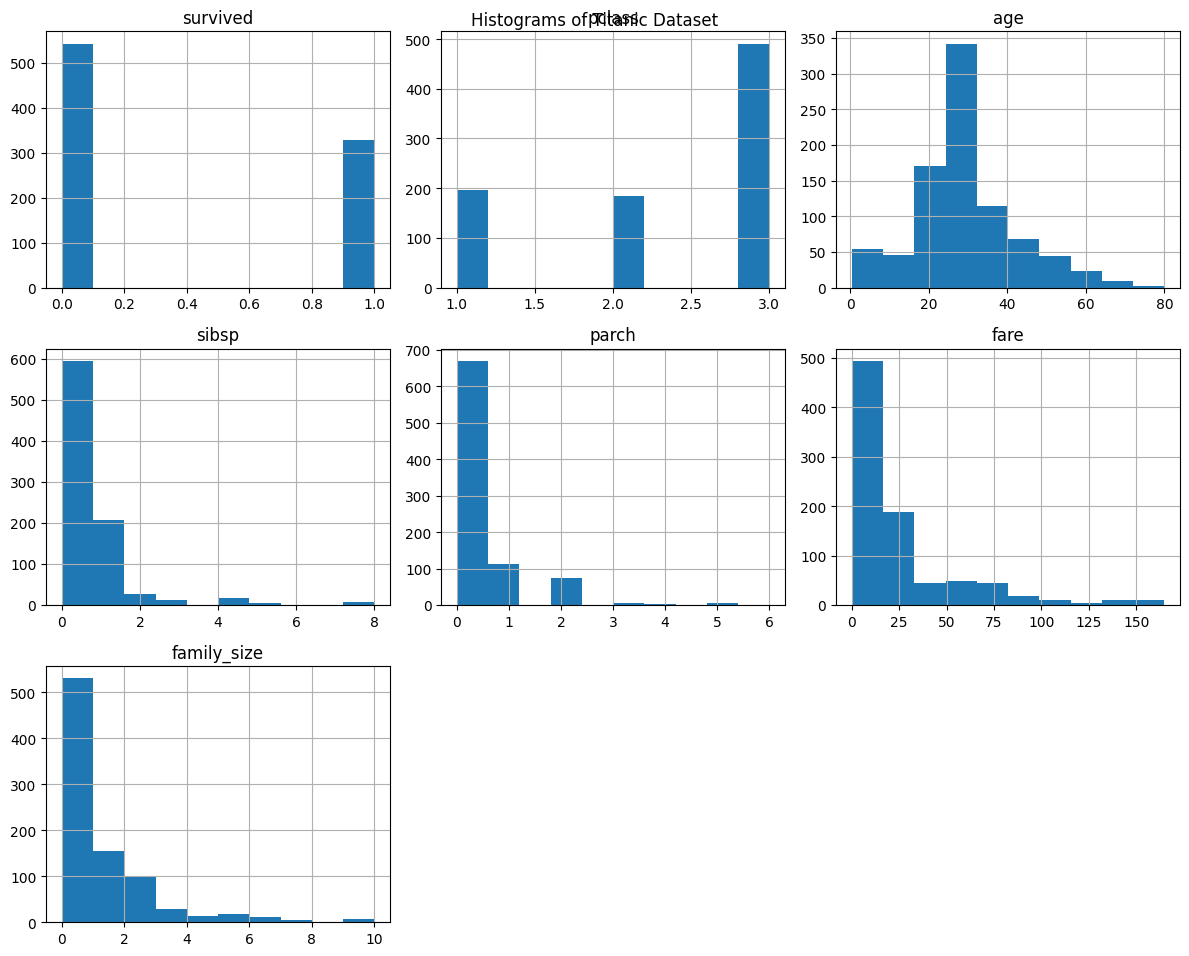

In [21]:
# Data visualization
# Histograms
titanic_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Titanic Dataset', y=0.95)
plt.tight_layout()
plt.show()



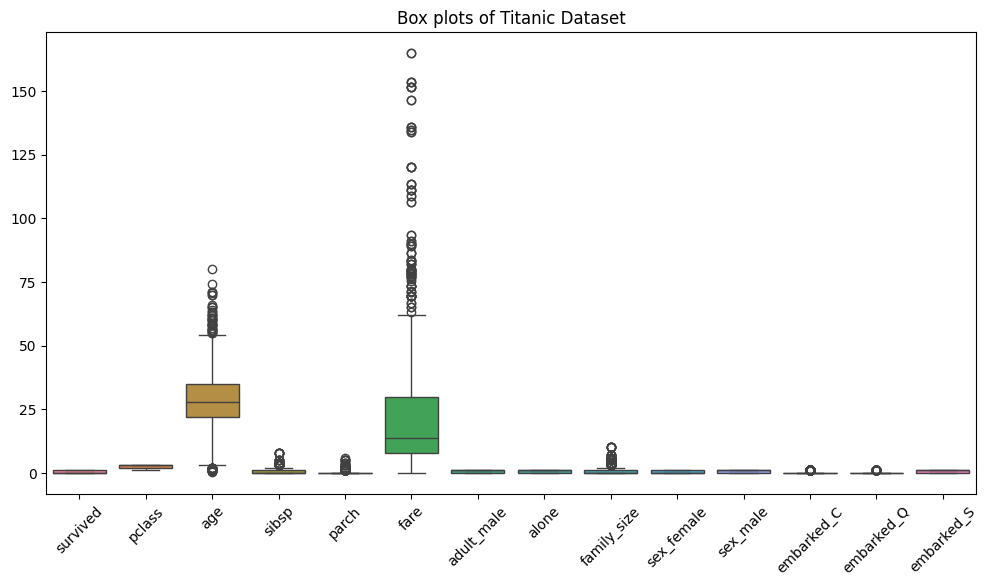

In [22]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df)
plt.title('Box plots of Titanic Dataset')
plt.xticks(rotation=45)
plt.show()



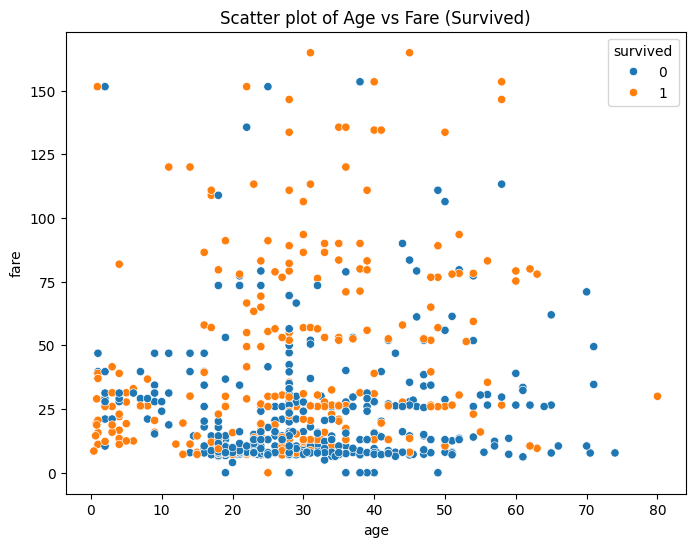

In [23]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_df, x='age', y='fare', hue='survived')
plt.title('Scatter plot of Age vs Fare (Survived)')
plt.show()



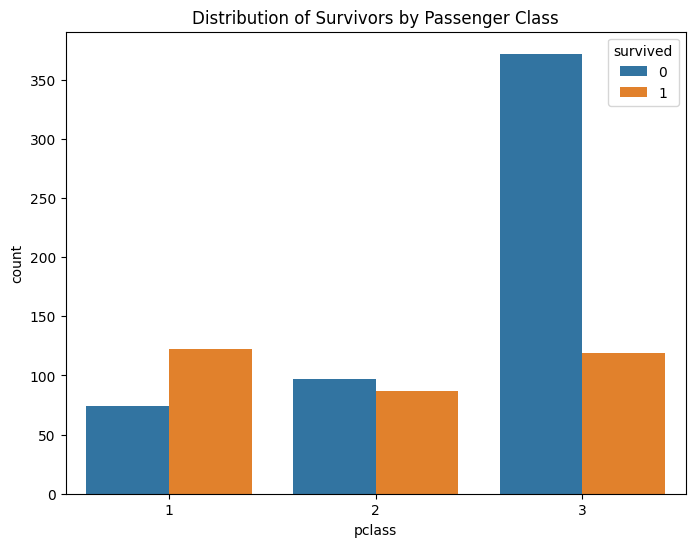

In [24]:
# Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='pclass', hue='survived')
plt.title('Distribution of Survivors by Passenger Class')
plt.show()



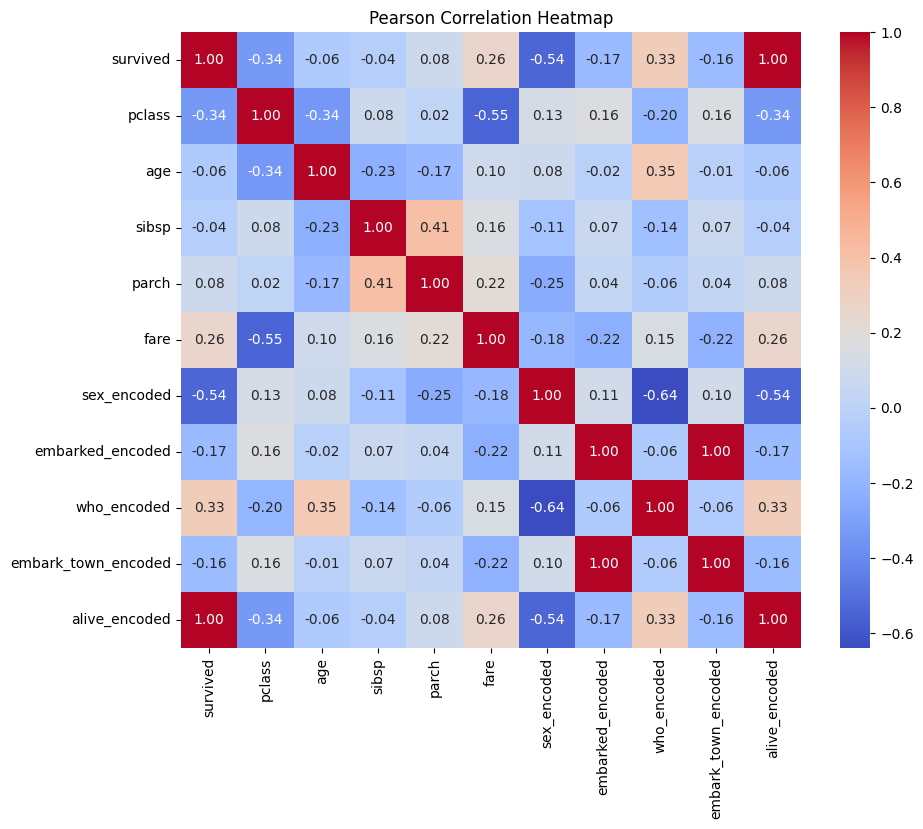

In [25]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()



In [26]:
# Pair plot
#sns.pairplot(titanic_df, hue='survived')
#plt.suptitle('Pairplot of Titanic Dataset', y=1.02)
#plt.show()


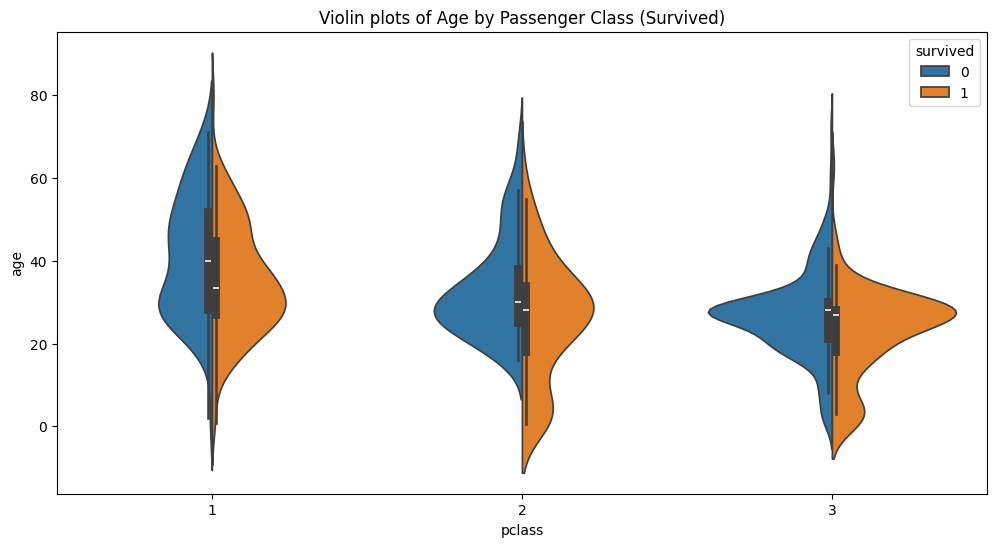

In [27]:
# Violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=titanic_df, x='pclass', y='age', hue='survived', split=True)
plt.title('Violin plots of Age by Passenger Class (Survived)')
plt.show()

In [28]:
titanic_df_copy_numerical_df.head()

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded,who_encoded,embark_town_encoded,alive_encoded
0,0,3,22.0,1,0,7.2500,1,2,1,2,0
1,1,1,38.0,1,0,71.2833,0,0,2,0,1
2,1,3,26.0,0,0,7.9250,0,2,2,2,1
3,1,1,35.0,1,0,53.1000,0,2,2,2,1
4,0,3,35.0,0,0,8.0500,1,2,1,2,0


In [29]:
# importing library
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Predictive Modeling
# Prepare data for modeling
X = titanic_df_copy_numerical_df.drop(['survived'], axis=1)
y = titanic_df_copy_numerical_df['survived']


In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Evaluate model
y_pred = rf_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

